# GPyOpt: Deep Bayesian Optimization 

In the [Introduction Bayesian Optimization GPyOpt](./GPyOpt_reference_manual.ipynb) we showed how GPyOpt can be used to solve optimization problems with some basic functionalities. The object 

```
GPyOpt.methods.BayesianOptimization
```
is used to initialize the desired functionalities, such us the acquisition function, the initial design or the model. In some cases we want to have control over those objects and we may want to replace some element in the loop without having to integrate the new elements in the base code framework. This is now possible through the modular implementation of the package using the

```
GPyOpt.methods.ModularBayesianOptimization
```

As usual, we start loading GPy and GPyOpt.

In [1]:
%pylab inline
import GPyOpt
import GPy
import deepgp

Populating the interactive namespace from numpy and matplotlib


In this example we will use the Branin function as a test case.

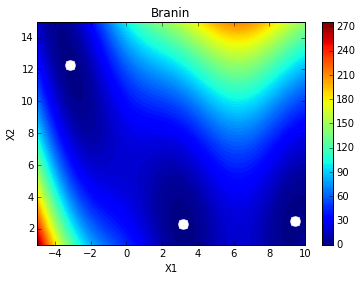

In [2]:
# --- Function to optimize
func  = GPyOpt.objective_examples.experiments2d.branin()
func.plot()

Because we are won't use the pre implemented wrapper, we need to create the classes for each element of the optimization. In total we need to create:

* Class for the **objective function**,

In [3]:
objective = GPyOpt.core.task.SingleObjective(func.f)

* Class for the **design space**,

In [4]:
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])

* Class for the **model type**,

In [5]:
modelGP = GPyOpt.models.GPModel(optimize_restarts=5,verbose=True)

* Class for the **acquisition optimizer**,

In [6]:
acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

* Class for the **initial design**,

In [7]:
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)

In [8]:
cost = GPyOpt.core.task.cost.CostModel(None)
acquisition_jitter=0.01

In [9]:
acquisition = GPyOpt.acquisitions.AcquisitionEI(modelGP, space, acquisition_optimizer, cost.cost_withGradients, acquisition_jitter)

* Finally we create the class for the **type of evaluator**,

In [10]:
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

With all the classes on place,including the one we have created for this example, we can now create the **Bayesian optimization object**.

In [11]:
bo = GPyOpt.methods.ModularBayesianOptimization(modelGP, space, objective, acquisition, evaluator, initial_design)
print bo.model.model

Optimization restart 1/5, f = 6.22736428114
Optimization restart 2/5, f = 6.22736405722
Optimization restart 3/5, f = 6.22736369243
Optimization restart 4/5, f = 6.22736364516
Optimization restart 5/5, f = 6.22736434711
** GPyOpt Bayesian Optimization class initialized succesfuly **

Name : GP regression
Objective : 6.22736364516
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  Mat32.variance           |      1.44480538978  |      +ve      |        
  Mat32.lengthscale        |      5.17158844019  |      +ve      |        
  Gaussian_noise.variance  |  1.33263647616e-09  |      +ve      |        


And we run the optimization.

In [12]:
max_iter  = 20                                            
bo.run_optimization(max_iter = max_iter) 

Optimization restart 1/5, f = 6.22736364516
Optimization restart 2/5, f = 6.22736399552
Optimization restart 3/5, f = 7.09469278626
Optimization restart 4/5, f = 6.22736548888
Optimization restart 5/5, f = 7.09469268065
Optimization restart 1/5, f = 6.29192850619
Optimization restart 2/5, f = 6.29192853185
Optimization restart 3/5, f = 6.29193793416
Optimization restart 4/5, f = 6.29192928771
Optimization restart 5/5, f = 6.29192851548
Optimization restart 1/5, f = 7.14583614984
Optimization restart 2/5, f = 7.14583642626
Optimization restart 3/5, f = 9.9325697181
Optimization restart 4/5, f = 7.14583970626
Optimization restart 5/5, f = 8.45144358454
Optimization restart 1/5, f = 6.75426641018
Optimization restart 2/5, f = 6.75426854633
Optimization restart 3/5, f = 6.75426733767
Optimization restart 4/5, f = 6.75426645564
Optimization restart 5/5, f = 6.75426641242
Optimization restart 1/5, f = 5.39650001958
Optimization restart 2/5, f = 5.39650339245
Optimization restart 3/5, f = 5.3

We plot the acquisition and the diagnostic plots.

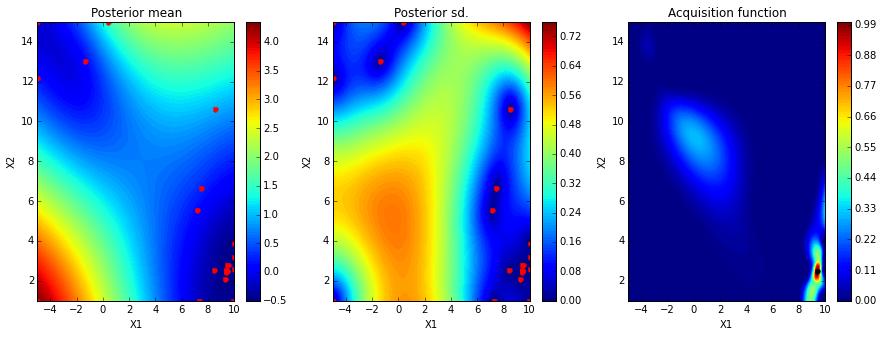

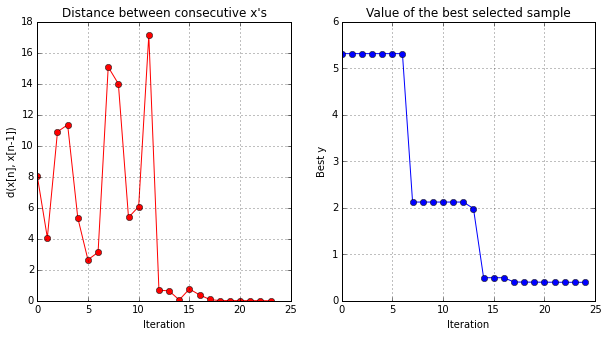

In [13]:
bo.plot_acquisition()
bo.plot_convergence()

# DeepGp

In [17]:
func  = GPyOpt.objective_examples.experiments2d.branin()
objective = GPyOpt.core.task.SingleObjective(func.f)
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])
acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
initial_design = GPyOpt.util.stats.initial_design('random', space, 50)
cost = GPyOpt.core.task.cost.CostModel(None)
acquisition_jitter=0.01

In [18]:
modelDeepGP = GPyOpt.models.DeepGPModel(optimize_restarts=0,max_iters=0, max_init_iters = 1000, verbose=True,back_constraint=False, repeatX=False, num_inducing=8)

acquisition = GPyOpt.acquisitions.AcquisitionEI(modelDeepGP, space, acquisition_optimizer, cost.cost_withGradients, acquisition_jitter)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)
boDeepGP = GPyOpt.methods.ModularBayesianOptimization(modelDeepGP, space, objective, acquisition, evaluator, initial_design)
print boDeepGP.model


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0001   5.137788e+03   2.506257e+06 
    00s14  0009   4.346574e+02   7.431499e+03 
    00s18  0012   4.021725e+02   4.472179e+03 
    00s48  0043   1.436822e+02   2.438519e+03 
    01s40  0134   1.011999e+02   1.222712e+03 
    02s62  0253   9.142182e+01   3.846996e+03 
    05s67  0551   8.594139e+01   1.591752e+02 
    10s21  1002   8.390636e+01   8.542600e+00 
Runtime:     10s21
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i   f              |g|        
    00s02  2   8.390407e+01   3.175110e+01 
Runtime:     00s02
Optimization status: Maximum number of f evaluations reached

** GPyOpt Bayesian Optimization class initialized succesfuly **


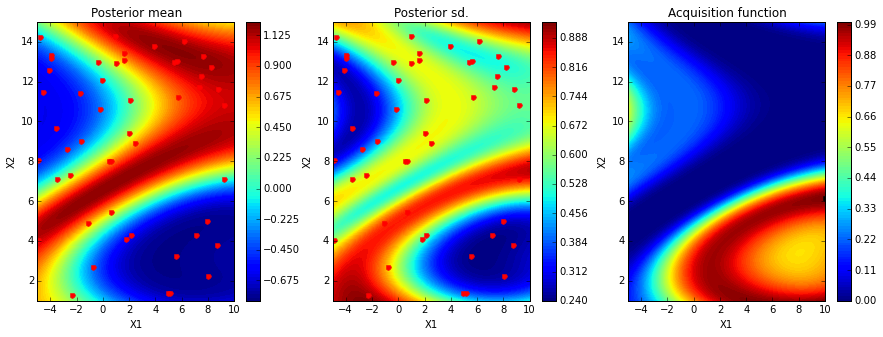

In [19]:
boDeepGP.plot_acquisition()

In [13]:
# Two loops: one with only fixed beta, one with both

boDeepGP.model.max_init_iters = 1000
boDeepGP.model.max_iters = 0
max_iter  = 3                                            
boDeepGP.run_optimization(max_iter = max_iter) 

boDeepGP.model.max_init_iters = 200
boDeepGP.model.max_iters = 800
max_iter  = 3                                            
boDeepGP.run_optimization(max_iter = max_iter) 

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s07  0005   1.843572e+01   1.601275e+01 
    00s19  0013   1.651426e+01   7.017647e+00 
    00s80  0075   1.525264e+01   3.396233e-01 
    01s42  0134   1.518678e+01   1.307723e-02 
    02s94  0282   1.517193e+01   1.808171e-04 
    06s91  0669   1.516962e+01   1.358806e-05 
    06s99  0678   1.516962e+01   1.931533e-06 
Runtime:     06s99
Optimization status: Converged

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i   f              |g|        
    00s02  2   1.516962e+01   2.183981e+00 
Runtime:     00s02
Optimization status: Maximum number of f evaluations reached

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s06  0004   2.313339e+01   6.926487e+01 
    00s18  0012   1.828196e+01   4.125736e+01 
    00s79  0073   1.583644e+01   2.118703e-01 
    01s09  0099   1.580987e+01   1.020994e-02 
    03s53  0338   1.578685e+01   2

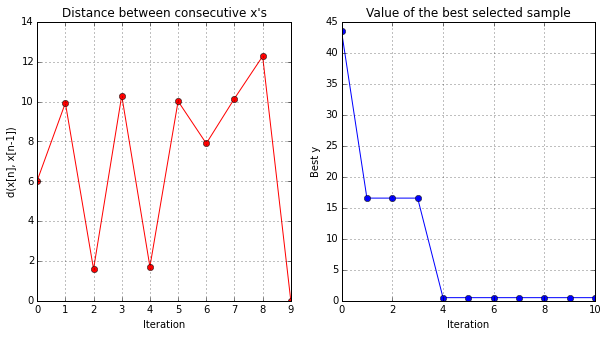

In [14]:
# boDeepGP.plot_acquisition()
boDeepGP.plot_convergence()

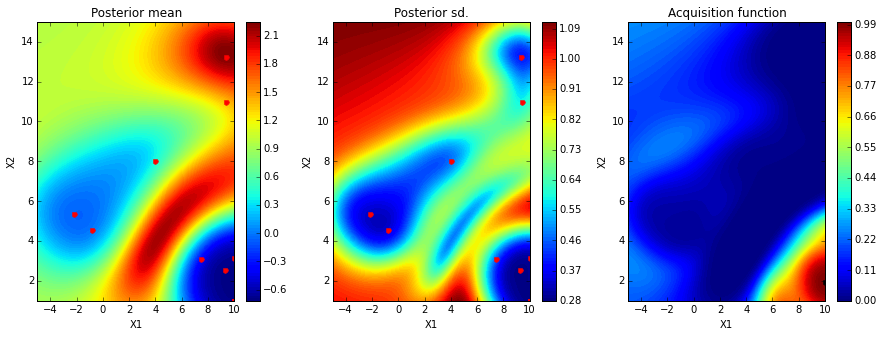

In [15]:
boDeepGP.plot_acquisition()